## 01. Importing the Libraries

In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns

from sklearn.model_selection import train_test_split

from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

## 02. Loading the Data

In [2]:
data = pd.read_csv('uci-secom.csv')
data.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [3]:
data.shape

(1567, 592)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [5]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


## 03. Data Processing

In [6]:
data = data.drop('Time',axis=1)


In [7]:
data.isnull().any()

0             True
1             True
2             True
3             True
4             True
             ...  
586           True
587           True
588           True
589           True
Pass/Fail    False
Length: 591, dtype: bool

Check the cardinality

Cardinality represents the number of unique values in a specific column. When there are very few unique values, or only one unique value, the cardinality is 1. Columns with a cardinality of 1 provide no variability or discrimination within the data, making them uninformative for building predictive models or conducting data analysis.

In [8]:
uni_list =[]

for column in data.columns:
  if (data[column].nunique() == 1):
    uni_list.append(column)

data.drop(columns=uni_list, axis =1, inplace=True)
data.shape


(1567, 475)

In [9]:
columns = data.columns
cols_remove = []
for i in columns:
    if (data[i].isna().sum() / data.shape[0] >= 0.2):
        cols_remove.append(i)
data = data.drop(labels=cols_remove, axis=1)
data.shape

(1567, 443)

In [10]:
len(data[data.duplicated()])

0

Remove the Missing Values

In [11]:
data = data.fillna(0)

data.isnull().any().any()

False

In [12]:
y = data['Pass/Fail']
y

0      -1
1      -1
2       1
3      -1
4      -1
       ..
1562   -1
1563   -1
1564   -1
1565   -1
1566   -1
Name: Pass/Fail, Length: 1567, dtype: int64

In [13]:
y.value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

In [14]:
data['Pass/Fail'] = data['Pass/Fail'].replace(to_replace=1,value=0)
data['Pass/Fail'] = data['Pass/Fail'].replace(to_replace=-1,value=1)

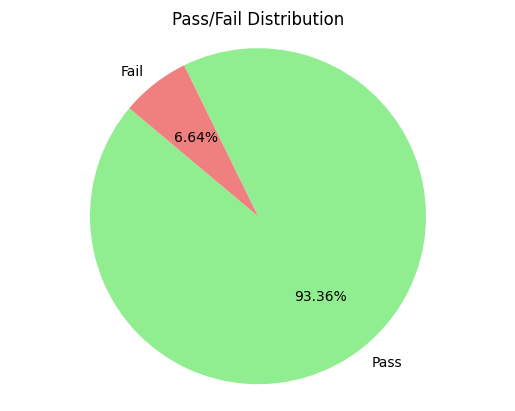

In [15]:
import matplotlib.pyplot as plt

pass_count = data['Pass/Fail'].sum()
fail_count = len(data) - pass_count
labels = ['Pass', 'Fail']
sizes = [pass_count, fail_count]
colors = ['lightgreen', 'lightcoral']

plt.pie(sizes, labels=labels, colors=colors, autopct='%0.2f%%', startangle=140)
plt.axis('equal')  
plt.title('Pass/Fail Distribution')
plt.show()


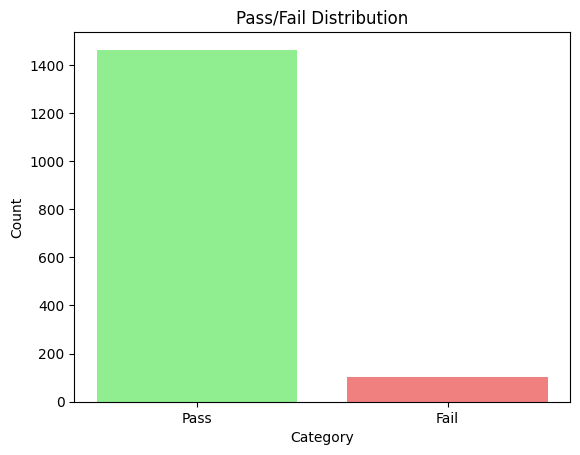

In [16]:
import matplotlib.pyplot as plt

pass_count = data['Pass/Fail'].sum()
fail_count = len(data) - pass_count
categories = ['Pass', 'Fail']
counts = [pass_count, fail_count]

plt.bar(categories, counts, color=['lightgreen', 'lightcoral'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Pass/Fail Distribution')
plt.show()


Text(0.5, 1.0, 'Correlation Heatmap')

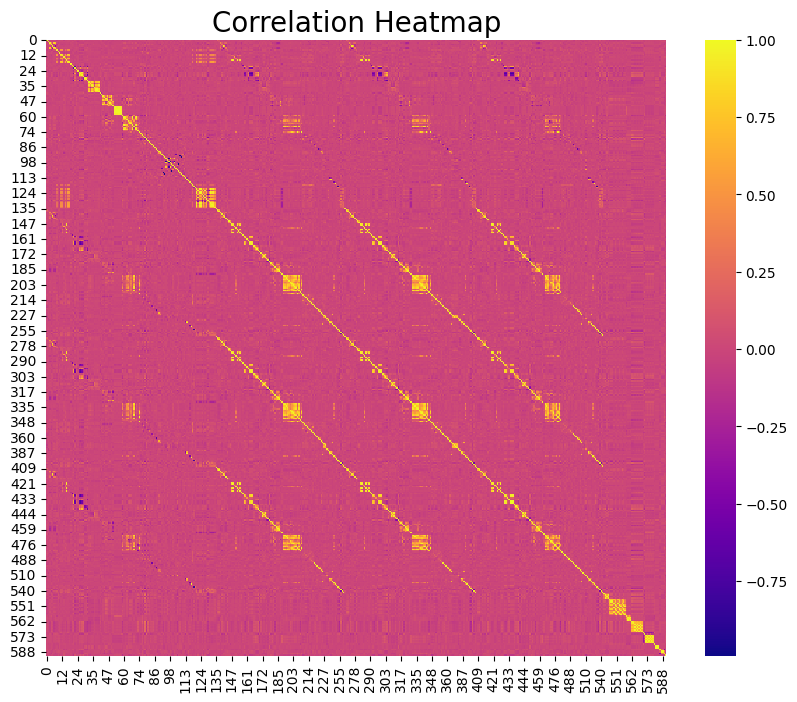

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), cmap = "plasma")
plt.title('Correlation Heatmap', fontsize = 20)

In [18]:
data.corr()

,0,1,2,3,4,6,7,8,9,10,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,1.000000,-0.047782,0.007590,0.009448,-0.000915,0.006129,0.010738,-0.050979,0.009959,-0.010253,...,0.017193,0.010503,0.019840,0.017889,0.019522,0.044745,0.005233,0.003918,0.021489,-0.006149
1,-0.047782,1.000000,-0.030448,0.006021,0.002192,-0.031616,-0.025086,0.027609,0.003704,0.028889,...,-0.001023,-0.017392,0.003809,0.004409,0.003821,-0.009219,0.039479,0.040500,0.044464,0.019672
2,0.007590,-0.030448,1.000000,0.323782,0.020438,0.818770,0.747230,0.002600,-0.045731,0.004713,...,0.014907,-0.010627,-0.004771,-0.003030,-0.004263,0.015733,-0.007090,-0.009122,-0.030434,-0.024929
3,0.009448,0.006021,0.323782,1.000000,-0.054015,-0.119180,0.279646,-0.108217,0.051567,0.046281,...,0.021228,0.009788,0.022593,0.022361,0.023288,0.038755,-0.038371,-0.033648,-0.084449,0.016341
4,-0.000915,0.002192,0.020438,-0.054015,1.000000,-0.034736,-0.475861,-0.020082,0.053859,-0.006505,...,-0.003936,0.012778,-0.001323,-0.001605,-0.001636,-0.043693,-0.030930,-0.026046,0.050741,0.013577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,0.044745,-0.009219,0.015733,0.038755,-0.043693,-0.005877,0.051943,0.017642,0.032423,0.000758,...,-0.002532,-0.008240,0.002391,0.001602,0.002872,1.000000,0.169634,0.165942,-0.484741,-0.004448
587,0.005233,0.039479,-0.007090,-0.038371,-0.030930,0.016362,-0.006335,0.027655,0.057856,0.047377,...,-0.009233,0.018981,-0.001809,-0.001696,-0.002122,0.169634,1.000000,0.974332,0.391503,-0.035670
588,0.003918,0.040500,-0.009122,-0.033648,-0.026046,0.013832,-0.014288,0.033729,0.059321,0.046459,...,-0.015420,0.019083,-0.001445,-0.001182,-0.001746,0.165942,0.974332,1.000000,0.389898,-0.031447
589,0.021489,0.044464,-0.030434,-0.084449,0.050741,0.002246,-0.067263,-0.016895,0.004106,0.008651,...,-0.024665,0.028502,-0.002453,-0.002750,-0.003266,-0.484741,0.391503,0.389898,1.000000,0.002472


## 04. Resampling the Unbalanced Data

In [19]:
y.value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

#### 1. UnderSampling


In [20]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=1)

X_resampled, y_resampled = rus.fit_resample(data.drop('Pass/Fail', axis=1), data['Pass/Fail'])


In [21]:
from sklearn.model_selection import train_test_split

x_train_us, x_test_us, y_train_us, y_test_us = train_test_split(X_resampled, y_resampled, test_size = 0.33, random_state = 1)

print(x_train_us.shape)
print(y_train_us.shape)
print(x_test_us.shape)
print(y_test_us.shape)

(139, 442)
(139,)
(69, 442)
(69,)


In [22]:
sc = StandardScaler()
x_train_us = sc.fit_transform(x_train_us)
x_test_us = sc.transform(x_test_us)

#### 2. Over Sampleing

In [23]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)

X_resampled, y_resampled = smote.fit_resample(data.drop('Pass/Fail', axis=1), data['Pass/Fail'])

In [24]:
x_train_os, x_test_os, y_train_os, y_test_os = train_test_split(X_resampled, y_resampled, test_size = 0.3, random_state = 1)

print(x_train_os.shape)
print(y_train_os.shape)
print(x_test_os.shape)
print(y_test_os.shape)

(2048, 442)
(2048,)
(878, 442)
(878,)


In [25]:
sc = StandardScaler()
x_train_os = sc.fit_transform(x_train_os)
x_test_os = sc.transform(x_test_os)

## 05. Data Modeling

In [26]:
x = data.drop("Pass/Fail", axis = 1)
y = data["Pass/Fail"]

print("shape of x:", x.shape)
print("shape of y:", y.shape)

shape of x: (1567, 442)
shape of y: (1567,)


In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 1)

print("shape of x_train: ", x_train.shape)
print("shape of x_test: ", x_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)

shape of x_train:  (1049, 442)
shape of x_test:  (518, 442)
shape of y_train:  (1049,)
shape of y_test:  (518,)


### Original Data

#### 1. Feature Scailing

In [28]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#### 2. XGBoost

In [29]:
xg = XGBClassifier(random_state=1)
xg.fit(x_train, y_train)
y_pred = xg.predict(x_test)

<AxesSubplot: >

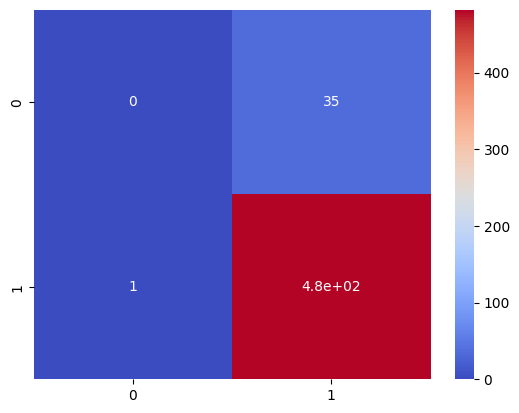

In [30]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = "coolwarm")

In [31]:
print("Accuracy: ", xg.score(x_test,y_test)*100)

Accuracy:  93.05019305019306


#### 3. RandomForestClassifier

In [32]:
rf = RandomForestClassifier(n_estimators=100, random_state=1,verbose=0 )
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

<AxesSubplot: >

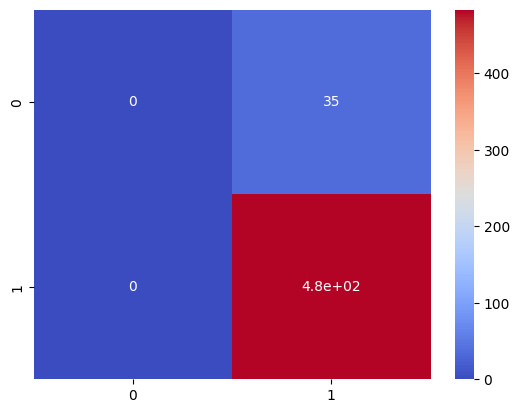

In [33]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = "coolwarm")

In [34]:
print("Accuracy: ", rf.score(x_test,y_test)*100)

Accuracy:  93.24324324324324


#### 4. Logistic Regression

In [35]:
lr = LogisticRegression(random_state=1)
lr.fit(x_train, y_train) 
y_pred = lr.predict(x_test)

c:\Users\sjy99\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot: >

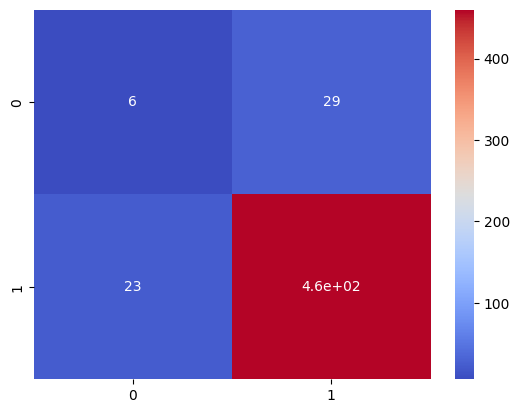

In [36]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = "coolwarm")

In [37]:
print("Accuracy: ", lr.score(x_test,y_test)*100)

Accuracy:  89.96138996138995


#### 5. Lasso

In [38]:
lasso = Lasso(alpha=0.1,random_state=1)
lasso.fit(x_train,y_train)
y_pred = lasso.predict(x_test)

In [39]:
y_pred2 = np.sign(y_pred)

In [40]:
print("Accuracy: ", lasso.score(x_test,y_test)*100)

Accuracy:  -0.005089317308049068


<AxesSubplot: >

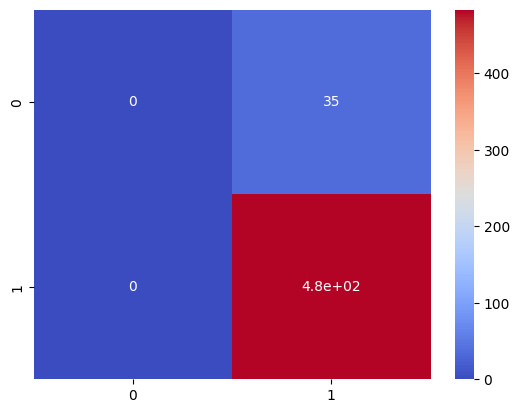

In [41]:
cm = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm, annot = True, cmap = "coolwarm")

### Undersampling

#### 1. XGBoost

In [42]:
model = XGBClassifier(random_state=1)
model.fit(x_train_us, y_train_us)
y_pred = model.predict(x_test_us)

<AxesSubplot: >

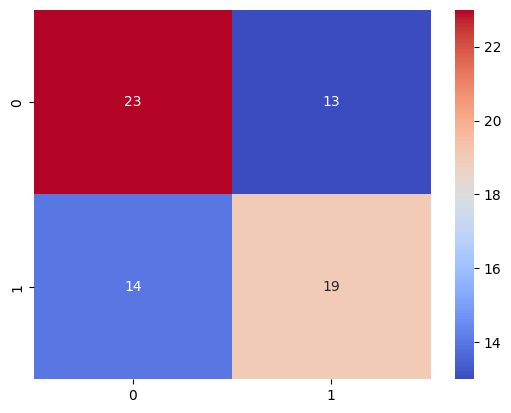

In [43]:
cm = confusion_matrix(y_test_us, y_pred)
sns.heatmap(cm, annot = True, cmap = "coolwarm")

In [44]:
print("Accuracy: ", model.score(x_test,y_test)*100)

Accuracy:  49.22779922779923


Hyper Parameter

In [45]:
parameters = [{'max_depth' : [1, 2, 3, 4, 5, 6],
              'cv' : [2,4,6,8,10],
              'random_state' : [1]}]

grid_search = GridSearchCV(estimator = model, param_grid = parameters, scoring = 'accuracy',  n_jobs = -1)

grid_search = grid_search.fit(x_train_us, y_train_us)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

c:\Users\sjy99\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:10:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "cv" } are not used.

  warnings.warn(smsg, UserWarning)


In [46]:
print("Best Accuracy: ", best_accuracy*100)
print("Best Parameter: ", best_parameters)

Best Accuracy:  63.227513227513235
Best Parameter:  {'cv': 2, 'max_depth': 1, 'random_state': 1}


In [47]:
weights = (y == 0).sum()/(1.0*(y == -1).sum())

model = XGBClassifier(max_depth = 3, scale_pos_weights = weights, n_jobs = 4,random_state=1,cv=2)
model.fit(x_train_us, y_train_us)
y_pred = model.predict(x_test_us)

C:\Users\sjy99\AppData\Local\Temp\ipykernel_24916\3140697125.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  weights = (y == 0).sum()/(1.0*(y == -1).sum())
c:\Users\sjy99\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:10:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "cv", "scale_pos_weights" } are not used.

  warnings.warn(smsg, UserWarning)


In [48]:
print("Accuracy: ", model.score(x_test,y_test)*100)

Accuracy:  58.301158301158296


<AxesSubplot: >

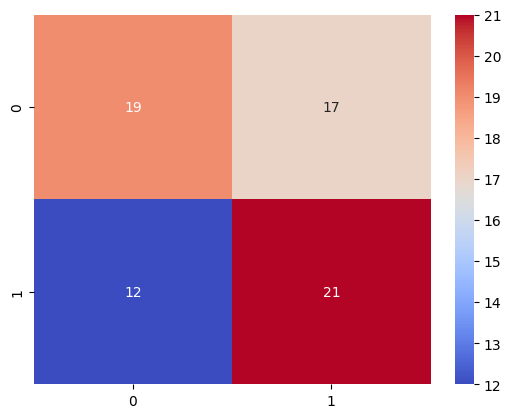

In [49]:
cm = confusion_matrix(y_test_us, y_pred)
sns.heatmap(cm, annot = True, cmap = "coolwarm")

#### 2. Random Forest 

In [50]:
model = RandomForestClassifier(n_estimators=100, random_state=1,verbose=0 )
model.fit(x_train_us, y_train_us)
y_pred = model.predict(x_test_us)

<AxesSubplot: >

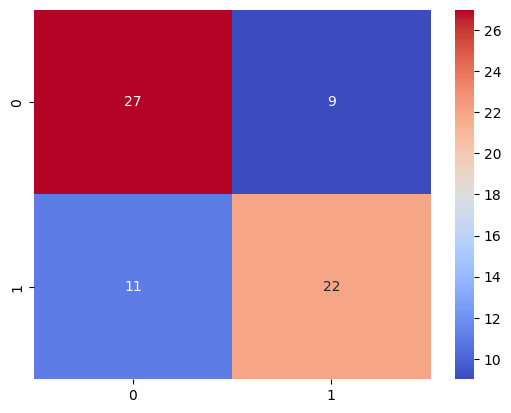

In [51]:
cm = confusion_matrix(y_test_us, y_pred)
sns.heatmap(cm, annot = True, cmap = "coolwarm")

In [52]:
print("Accuracy: ", model.score(x_test,y_test)*100)

Accuracy:  60.810810810810814


#### 3. Logistic Regression

In [53]:
lr = LogisticRegression(random_state=1)
lr.fit(x_train_us, y_train_us)

LogisticRegression(random_state=1)

In [54]:
y_pred = lr.predict(x_test_us)

<AxesSubplot: >

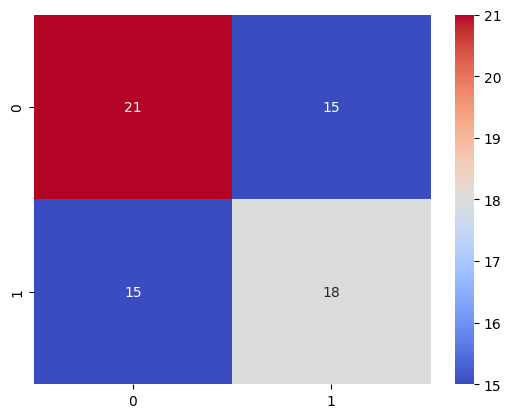

In [55]:
cm = confusion_matrix(y_test_us, y_pred)
sns.heatmap(cm, annot = True, cmap = "coolwarm")

In [56]:
print("Accuracy: ", lr.score(x_test,y_test)*100)

Accuracy:  60.810810810810814


#### 4. Lasso

In [57]:
lasso = Lasso(alpha=0.1,random_state=1)
lasso.fit(x_train_us,y_train_us)
#print ("Lasso model:", (lasso.coef_))

Lasso(alpha=0.1, random_state=1)

In [58]:
y_pred = lasso.predict(x_test_us)

In [59]:
print(y_pred)

[ 0.56789209  0.46948512  0.47287251  0.47634781  0.51087915  0.41225367
  0.51830659  0.50345356  0.37562578  0.51424704  0.47867822  0.4972246
  0.55117606 -0.09399499  0.50505647  0.51066802  0.51195414  0.57149532
  0.37488922  0.51171852  0.60336042  0.52708917  0.40514781  0.45845617
  0.46668283  0.52399208  0.26832258  0.46725316  0.41039097  0.42651113
  0.58331501  0.55355362  0.36315634  0.42859807  0.56438085  0.60185022
  0.44627873  0.41380746  0.51795804  0.5353829   0.62672783  0.53901043
  0.4690506   0.54044797  0.53458492  0.50390937  0.52916049  0.51010956
  0.50798511  0.4535815   0.57813361  0.49940456  0.5234911   0.47199068
  0.55224864  0.66176821  0.39710885  0.55336992  0.58104378  0.4951501
  0.63366704  0.49321846  0.49807776  0.62850915  0.56730851  0.45404276
  0.48996053  0.53474419  0.55472135]


In [60]:
print(y_test_us)

1133    1
1265    1
225     1
665     1
495     0
       ..
424     0
1328    0
392     0
1363    0
1293    1
Name: Pass/Fail, Length: 69, dtype: int64


### Oversampling

#### 1. XGboost

In [61]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

model = XGBClassifier(random_state=1)
model.fit(x_train_os, y_train_os)
y_pred = model.predict(x_test_os)

In [62]:
from sklearn.model_selection import GridSearchCV

parameters = [{'max_depth' : [1, 2, 3, 4, 5, 6],
              'cv' : [2,4,6,8,10],
              'random_state' : [1]}]

grid_search = GridSearchCV(estimator = model, param_grid = parameters, scoring = 'accuracy', n_jobs = -1)
grid_search = grid_search.fit(x_train_os, y_train_os)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

c:\Users\sjy99\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:11:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "cv" } are not used.

  warnings.warn(smsg, UserWarning)


In [63]:
print("Best Accuracy: ", best_accuracy)
print("Best Parameter: ", best_parameters)

Best Accuracy:  0.9765627049913531
Best Parameter:  {'cv': 2, 'max_depth': 5, 'random_state': 1}


In [64]:
weights = (y == 0).sum()/(1.0*(y == -1).sum())

model = XGBClassifier(max_depth = 1, scale_pos_weights = weights, n_jobs = 4,random_state=1,cv=2)
model.fit(x_train_os, y_train_os)
y_pred = model.predict(x_test_os)

C:\Users\sjy99\AppData\Local\Temp\ipykernel_24916\3670563593.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  weights = (y == 0).sum()/(1.0*(y == -1).sum())
c:\Users\sjy99\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:11:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "cv", "scale_pos_weights" } are not used.

  warnings.warn(smsg, UserWarning)


<AxesSubplot: >

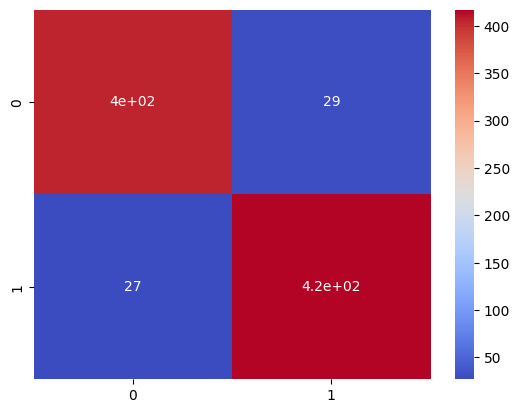

In [65]:
cm = confusion_matrix(y_test_os, y_pred)
sns.heatmap(cm, annot = True, cmap = "coolwarm")

In [66]:
print("Accuracy: ", model.score(x_test,y_test)*100)

Accuracy:  25.675675675675674


#### 2. Random Forest

In [67]:
model = RandomForestClassifier(n_estimators=100, random_state=1,verbose=0 )
model.fit(x_train_os, y_train_os)
y_pred = model.predict(x_test_os)
print("Accuracy: ", model.score(x_test_os,y_test_os)*100)

Accuracy:  99.54441913439635


<AxesSubplot: >

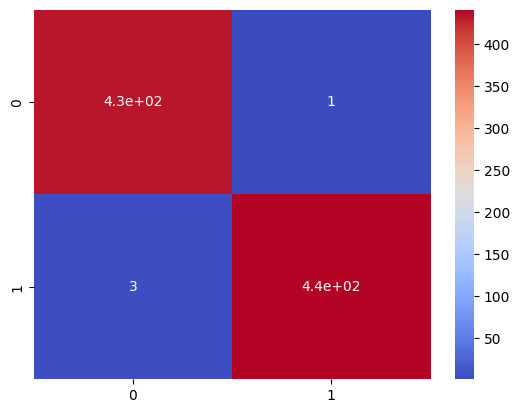

In [68]:
cm = confusion_matrix(y_test_os, y_pred)
sns.heatmap(cm, annot = True, cmap = "coolwarm")

#### 3. Logistic Regression

In [69]:
lr = LogisticRegression(random_state=1)
lr.fit(x_train_os, y_train_os) 
y_pred = lr.predict(x_test_os)

print("Accuracy: ", lr.score(x_test_os,y_test_os)*100)

Accuracy:  94.53302961275627


c:\Users\sjy99\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot: >

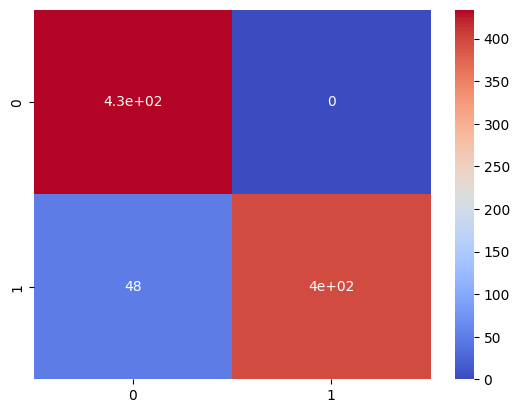

In [70]:
cm = confusion_matrix(y_test_os, y_pred)
sns.heatmap(cm, annot = True, cmap = "coolwarm")

#### 4. Lasso

In [71]:
lasso = Lasso(alpha=0.1,random_state=1)
lasso.fit(x_train_os,y_train_os)
#print ("Lasso model:", (lasso.coef_))

Lasso(alpha=0.1, random_state=1)

In [72]:
y_pred = lasso.predict(x_test_os)

In [73]:
data.shape

(1567, 443)

## 06. Dimension reduction Using PCA

In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_new = sc.fit_transform(data.iloc[:,:442])

In [75]:
data_new = pd.DataFrame(data_new, columns=data.iloc[:,:442].columns)

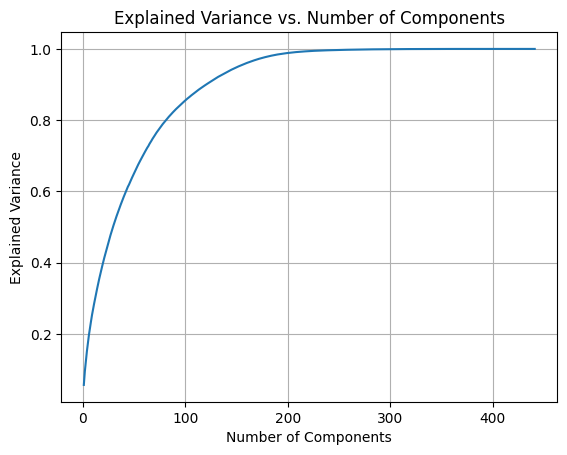

In [76]:
from sklearn.decomposition import PCA

n_components_range = np.arange(1, 442)  

explained_variance_ratio = []  

for n in n_components_range:
    pca = PCA(n_components=n)
    pca.fit(data_new)
    explained_variance_ratio.append(np.sum(pca.explained_variance_ratio_))

plt.plot(n_components_range, explained_variance_ratio)
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance")
plt.title("Explained Variance vs. Number of Components")
plt.grid()

In [77]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

pca = PCA(n_components=130)
data_pca = pca.fit_transform(data_new)
data_pca.transpose()


array([[ -1.50203532,  -1.99741912,   0.04934203, ...,  -1.08011551,
         -1.01649699,   1.81688693],
       [  3.4674355 ,   1.44260875,   0.24664501, ...,   0.22490068,
         -3.58237282,  -0.60644142],
       [  4.78202913,   3.57770858,   0.19019517, ..., -17.39220467,
         -3.64100288, -17.60918512],
       ...,
       [  0.124867  ,   1.00650271,  -0.23641264, ...,  -1.0113972 ,
         -1.41635795,   0.56750554],
       [  0.56463808,  -0.16320119,  -1.30925386, ...,  -0.12382488,
         -1.08951781,  -0.24620065],
       [  0.24122714,   0.76770035,   0.15390724, ...,  -0.02133857,
          2.222425  ,   0.16746827]])

In [78]:
df_pca2 = pd.DataFrame(data_pca)
df_pca2.head()

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
0,-1.502035,3.467435,4.782029,-3.304619,0.645071,-1.877408,1.456032,1.691216,1.240123,-0.603665,...,0.379184,0.193835,1.571710,0.422633,0.707749,-0.561583,0.681083,0.124867,0.564638,0.241227
1,-1.997419,1.442609,3.577709,-2.597780,1.493306,-2.574726,0.933502,3.418478,-0.206004,0.042215,...,-0.475969,-1.926326,-0.605615,0.280498,0.149001,1.444287,0.083198,1.006503,-0.163201,0.767700
2,0.049342,0.246645,0.190195,0.102416,0.060871,0.249709,-0.837900,2.299013,-0.285554,0.819746,...,-1.635334,0.365980,0.276045,-0.156861,-0.594333,0.433168,0.399751,-0.236413,-1.309254,0.153907
3,0.381031,1.699550,-1.813375,6.452109,-0.580105,0.199045,-0.193733,21.802232,26.971331,11.541571,...,-0.416821,-0.677760,-2.130264,-0.115487,0.381782,-0.642927,0.564250,0.949964,1.204243,-0.485718
4,0.352437,3.508900,3.433569,-1.105600,0.013368,0.365008,-0.820105,0.763927,6.075791,2.746390,...,0.085567,0.313698,-0.707298,0.973018,-0.216095,0.361385,0.967686,-0.553032,-0.121484,0.829829


In [79]:
df_pca2

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
0,-1.502035,3.467435,4.782029,-3.304619,0.645071,-1.877408,1.456032,1.691216,1.240123,-0.603665,...,0.379184,0.193835,1.571710,0.422633,0.707749,-0.561583,0.681083,0.124867,0.564638,0.241227
1,-1.997419,1.442609,3.577709,-2.597780,1.493306,-2.574726,0.933502,3.418478,-0.206004,0.042215,...,-0.475969,-1.926326,-0.605615,0.280498,0.149001,1.444287,0.083198,1.006503,-0.163201,0.767700
2,0.049342,0.246645,0.190195,0.102416,0.060871,0.249709,-0.837900,2.299013,-0.285554,0.819746,...,-1.635334,0.365980,0.276045,-0.156861,-0.594333,0.433168,0.399751,-0.236413,-1.309254,0.153907
3,0.381031,1.699550,-1.813375,6.452109,-0.580105,0.199045,-0.193733,21.802232,26.971331,11.541571,...,-0.416821,-0.677760,-2.130264,-0.115487,0.381782,-0.642927,0.564250,0.949964,1.204243,-0.485718
4,0.352437,3.508900,3.433569,-1.105600,0.013368,0.365008,-0.820105,0.763927,6.075791,2.746390,...,0.085567,0.313698,-0.707298,0.973018,-0.216095,0.361385,0.967686,-0.553032,-0.121484,0.829829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,-1.145281,-3.779452,-3.505636,5.405693,1.680254,0.662951,-1.886580,-0.024988,1.212802,-2.637610,...,0.092543,-0.414369,-0.163768,0.101166,-0.513643,-0.083033,-1.084779,-0.157527,0.459761,-0.944229
1563,-0.440840,0.134049,1.531609,0.174605,0.967172,-1.230714,0.386541,4.798215,-0.642088,-3.353683,...,-1.399767,0.542176,-0.257922,-0.686457,-0.843467,-1.130166,-0.306455,-1.315290,-0.734762,-0.960827
1564,-1.080116,0.224901,-17.392205,-4.393123,56.175580,-2.973111,-0.601834,-2.965516,1.349551,-2.971801,...,-0.914748,-1.225812,0.573623,-0.405928,-0.269196,-0.527163,0.638440,-1.011397,-0.123825,-0.021339
1565,-1.016497,-3.582373,-3.641003,2.242628,1.356729,0.275267,-2.068500,-1.069606,1.051534,-6.269360,...,-0.270545,0.153110,1.079103,-0.175458,-0.248805,-0.512272,-0.696030,-1.416358,-1.089518,2.222425


Check the Outlier and Filtering

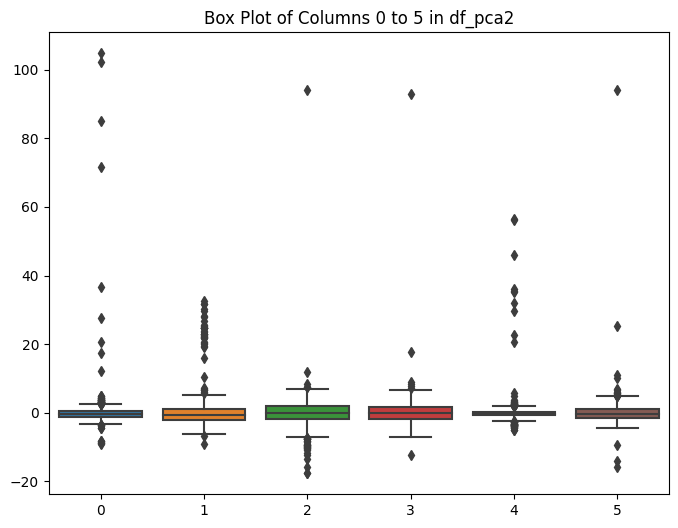

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

subset_df = df_pca2.iloc[:, [0, 1, 2, 3, 4, 5]]

plt.figure(figsize=(8, 6))
sns.boxplot(data=subset_df)
plt.title("Box Plot of Columns 0 to 5 in df_pca2")
plt.show()


In [81]:
pd_data = df_pca2

from scipy import stats

def remove_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = stats.iqr(column)
    lower_bound = Q1 -  IQR
    upper_bound = Q3 +  IQR
    
    column = column.apply(lambda x: x if (x > lower_bound and x < upper_bound) else column.median())
    return column

for column in pd_data.columns:
    pd_data[column] = remove_outliers_iqr(pd_data[column])


In [82]:
pd_data

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
0,-1.502035,3.467435,4.782029,-3.304619,0.645071,-1.877408,1.456032,1.691216,1.240123,-0.603665,...,0.379184,0.193835,1.571710,0.422633,0.707749,-0.561583,0.681083,0.124867,0.564638,0.241227
1,-1.997419,1.442609,3.577709,-2.597780,-0.195043,-2.574726,0.933502,3.418478,-0.206004,0.042215,...,-0.475969,-0.006050,-0.605615,0.280498,0.149001,1.444287,0.083198,1.006503,-0.163201,0.767700
2,0.049342,0.246645,0.190195,0.102416,0.060871,0.249709,-0.837900,2.299013,-0.285554,0.819746,...,-1.635334,0.365980,0.276045,-0.156861,-0.594333,0.433168,0.399751,-0.236413,-1.309254,0.153907
3,0.381031,1.699550,-1.813375,0.024583,-0.580105,0.199045,-0.193733,0.298010,-0.003867,0.080237,...,-0.416821,-0.677760,-0.010291,-0.115487,0.381782,-0.642927,0.564250,0.949964,1.204243,-0.485718
4,0.352437,3.508900,3.433569,-1.105600,0.013368,0.365008,-0.820105,0.763927,-0.003867,2.746390,...,0.085567,0.313698,-0.707298,0.973018,-0.216095,0.361385,0.967686,-0.553032,-0.121484,0.829829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,-1.145281,-3.779452,-3.505636,0.024583,-0.195043,0.662951,-1.886580,-0.024988,1.212802,-2.637610,...,0.092543,-0.414369,-0.163768,0.101166,-0.513643,-0.083033,-1.084779,-0.157527,0.459761,-0.944229
1563,-0.440840,0.134049,1.531609,0.174605,0.967172,-1.230714,0.386541,4.798215,-0.642088,-3.353683,...,-1.399767,0.542176,-0.257922,-0.686457,-0.843467,-1.130166,-0.306455,-1.315290,-0.734762,-0.960827
1564,-1.080116,0.224901,-0.167753,-4.393123,-0.195043,-2.973111,-0.601834,-2.965516,1.349551,-2.971801,...,-0.914748,-1.225812,0.573623,-0.405928,-0.269196,-0.527163,0.638440,-1.011397,-0.123825,-0.021339
1565,-1.016497,-3.582373,-3.641003,2.242628,1.356729,0.275267,-2.068500,-1.069606,1.051534,0.080237,...,-0.270545,0.153110,1.079103,-0.175458,-0.248805,-0.512272,-0.696030,-1.416358,-1.089518,-0.015340


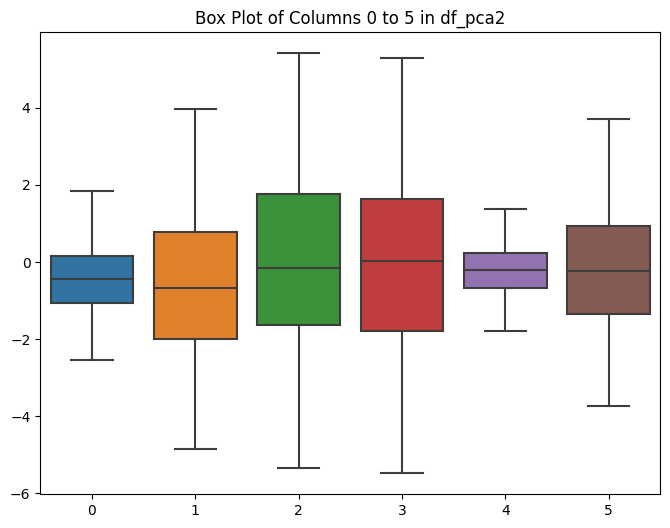

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

subset_df = df_pca2.iloc[:, [0, 1, 2, 3, 4, 5]]

plt.figure(figsize=(8, 6))
sns.boxplot(data=subset_df)
plt.title("Box Plot of Columns 0 to 5 in df_pca2")
plt.show()


#### Undersampling with PCA data 

In [84]:
df_pca2["Pass/Fail"] = data["Pass/Fail"] 


In [85]:
X = df_pca2.iloc[:, df_pca2.columns != 'Pass/Fail'] 
y = df_pca2.iloc[:, df_pca2.columns == 'Pass/Fail'] 

print("shape of x:", X.shape)
print("shape of y:", y.shape)


shape of x: (1567, 130)
shape of y: (1567, 1)


In [86]:
df_pca2['Pass/Fail'].value_counts()

1    1463
0     104
Name: Pass/Fail, dtype: int64

In [87]:
failed_tests = np.array(df_pca2[df_pca2['Pass/Fail'] == 1].index)
no_failed_tests = len(failed_tests)

print(no_failed_tests)

1463


In [88]:
failed_tests = np.array(df_pca2[df_pca2['Pass/Fail'] == 0].index)
no_failed_tests = len(failed_tests)

print(no_failed_tests)

104


In [89]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=1)

X_resampled, y_resampled = rus.fit_resample(df_pca2.drop('Pass/Fail', axis=1), df_pca2['Pass/Fail'])


In [90]:
from sklearn.model_selection import train_test_split

x_train_us, x_test_us, y_train_us, y_test_us = train_test_split(X_resampled, y_resampled, test_size = 0.33, random_state = 1)

print(x_train_us.shape)
print(y_train_us.shape)
print(x_test_us.shape)
print(y_test_us.shape)

(139, 130)
(139,)
(69, 130)
(69,)


In [91]:
sc = StandardScaler()
x_train_us = sc.fit_transform(x_train_us)
x_test_us = sc.transform(x_test_us)

### Data Modeling, original PCA data

In [92]:
x = df_pca2.drop("Pass/Fail", axis = 1)
y = df_pca2["Pass/Fail"]

print("shape of x:", x.shape)
print("shape of y:", y.shape)

shape of x: (1567, 130)
shape of y: (1567,)


In [93]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 1)

print("shape of x_train: ", x_train.shape)
print("shape of x_test: ", x_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)

shape of x_train:  (1049, 130)
shape of x_test:  (518, 130)
shape of y_train:  (1049,)
shape of y_test:  (518,)


#### 1. Feature Scailing

In [94]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#### 2. XGBoost

In [95]:
xg = XGBClassifier(random_state=1)
xg.fit(x_train, y_train)
y_pred = xg.predict(x_test)

<AxesSubplot: >

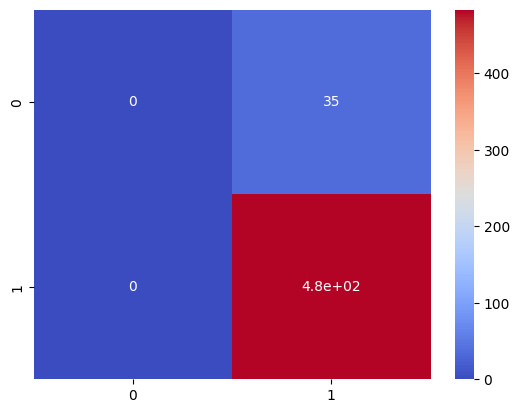

In [96]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = "coolwarm")

In [97]:
print("Accuracy: ", xg.score(x_test,y_test)*100)

Accuracy:  93.24324324324324


#### 3. RandomForestClassifier

In [98]:
rf = RandomForestClassifier(n_estimators=100, random_state=1,verbose=0 )
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

<AxesSubplot: >

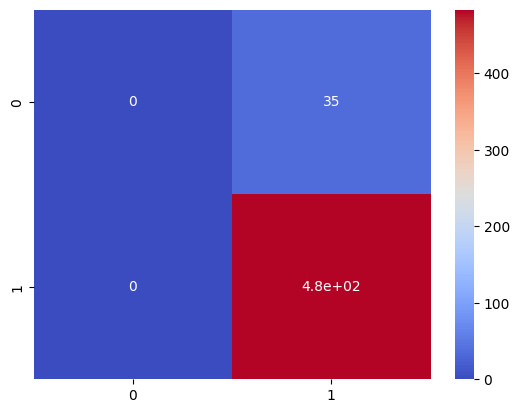

In [99]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = "coolwarm")

In [100]:
print("Accuracy: ", rf.score(x_test,y_test)*100)

Accuracy:  93.24324324324324


#### 4. Logistic Regression

In [101]:
lr = LogisticRegression(random_state=1)
lr.fit(x_train, y_train) 
y_pred = lr.predict(x_test)

<AxesSubplot: >

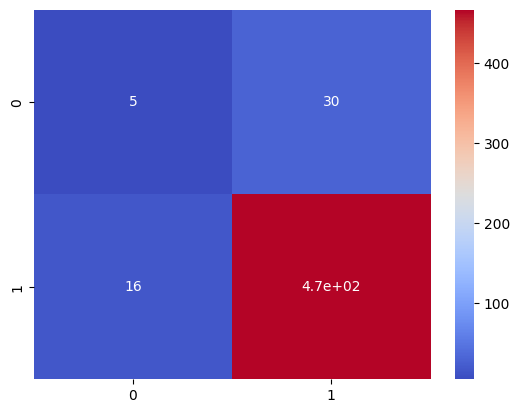

In [102]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = "coolwarm")

In [103]:
print("Accuracy: ", lr.score(x_test,y_test)*100)

Accuracy:  91.11969111969111


#### 5. Lasso

In [104]:
lasso = Lasso(alpha=0.1,random_state=1)
lasso.fit(x_train,y_train)
y_pred = lasso.predict(x_test)

In [105]:
y_pred2 = np.sign(y_pred)

In [106]:
print("Accuracy: ", lasso.score(x_test,y_test)*100)

Accuracy:  -0.005089317308049068


<AxesSubplot: >

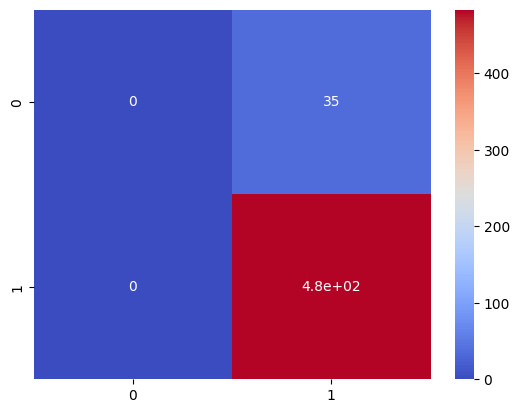

In [107]:
cm = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm, annot = True, cmap = "coolwarm")

### Undersampling

#### 1. XGBoost

In [108]:
model = XGBClassifier(random_state=1)
model.fit(x_train_us, y_train_us)
y_pred = model.predict(x_test_us)

<AxesSubplot: >

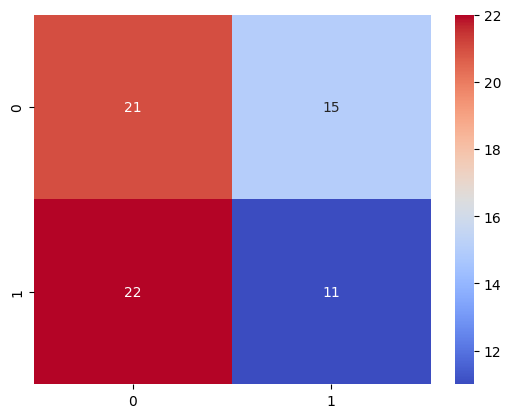

In [109]:
cm = confusion_matrix(y_test_us, y_pred)
sns.heatmap(cm, annot = True, cmap = "coolwarm")

In [110]:
print("Accuracy: ", model.score(x_test,y_test)*100)

Accuracy:  55.79150579150579


In [111]:
parameters = [{'max_depth' : [1, 2, 3, 4, 5, 6],
              'cv' : [2,4,6,8,10],
              'random_state' : [1]}]

grid_search = GridSearchCV(estimator = model, param_grid = parameters, scoring = 'accuracy',  n_jobs = -1)

grid_search = grid_search.fit(x_train_us, y_train_us)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

c:\Users\sjy99\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:13:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "cv" } are not used.

  warnings.warn(smsg, UserWarning)


In [112]:
print("Best Accuracy: ", best_accuracy*100)
print("Best Parameter: ", best_parameters)

Best Accuracy:  51.7989417989418
Best Parameter:  {'cv': 2, 'max_depth': 4, 'random_state': 1}


In [113]:
weights = (y == 0).sum()/(1.0*(y == -1).sum())

model = XGBClassifier(max_depth = 3, scale_pos_weights = weights, n_jobs = 4,random_state=1,cv=2)
model.fit(x_train_us, y_train_us)
y_pred = model.predict(x_test_us)

C:\Users\sjy99\AppData\Local\Temp\ipykernel_24916\3140697125.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  weights = (y == 0).sum()/(1.0*(y == -1).sum())
c:\Users\sjy99\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:13:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "cv", "scale_pos_weights" } are not used.

  warnings.warn(smsg, UserWarning)


In [114]:
print("Accuracy: ", model.score(x_test,y_test)*100)

Accuracy:  56.37065637065637


<AxesSubplot: >

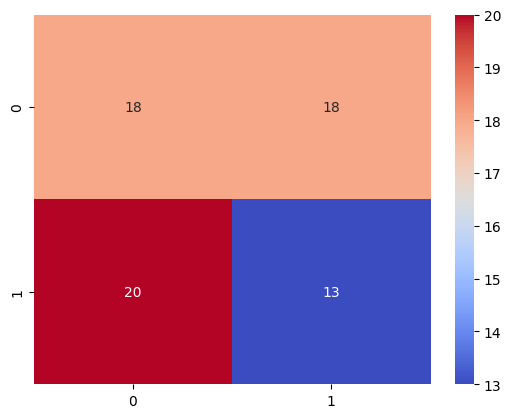

In [115]:
cm = confusion_matrix(y_test_us, y_pred)
sns.heatmap(cm, annot = True, cmap = "coolwarm")

#### 2. Random Forest 

In [116]:
model = RandomForestClassifier(n_estimators=100, random_state=1,verbose=0 )
model.fit(x_train_us, y_train_us)
y_pred = model.predict(x_test_us)

<AxesSubplot: >

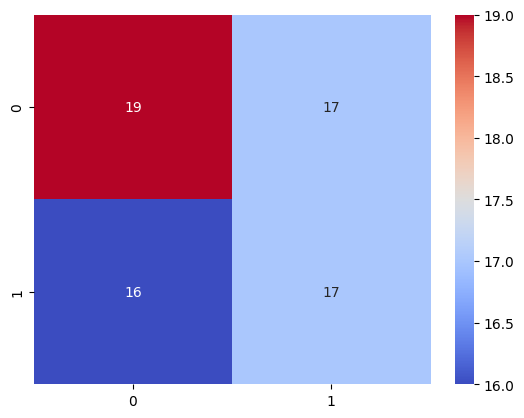

In [117]:
cm = confusion_matrix(y_test_us, y_pred)
sns.heatmap(cm, annot = True, cmap = "coolwarm")

In [118]:
print("Accuracy: ", model.score(x_test,y_test)*100)

Accuracy:  64.47876447876449


#### 3. Logistic Regression

In [119]:
lr = LogisticRegression(random_state=1)
lr.fit(x_train_us, y_train_us)

LogisticRegression(random_state=1)

In [120]:
y_pred = lr.predict(x_test_us)

<AxesSubplot: >

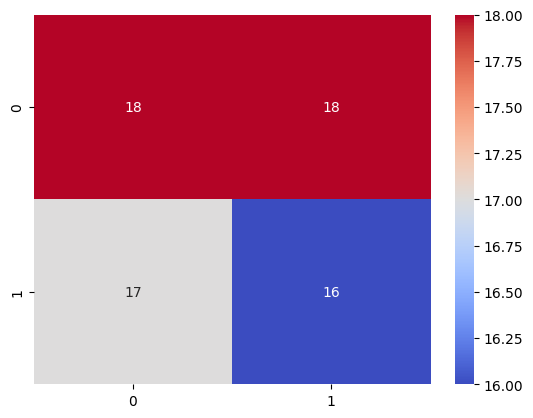

In [121]:
cm = confusion_matrix(y_test_us, y_pred)
sns.heatmap(cm, annot = True, cmap = "coolwarm")

In [122]:
print("Accuracy: ", lr.score(x_test,y_test)*100)

Accuracy:  51.737451737451735


#### 5. Lasso

In [123]:
lasso = Lasso(alpha=0.1,random_state=1)
lasso.fit(x_train_us,y_train_us)
#print ("Lasso model:", (lasso.coef_))

Lasso(alpha=0.1, random_state=1)

In [124]:
y_pred = lasso.predict(x_test_us)

In [125]:
print("Accuracy: ", lasso.score(x_test_us, y_test_us)*100)

Accuracy:  1.229912462906435


In [126]:
y_pred2 = np.sign(y_pred)

<AxesSubplot: >

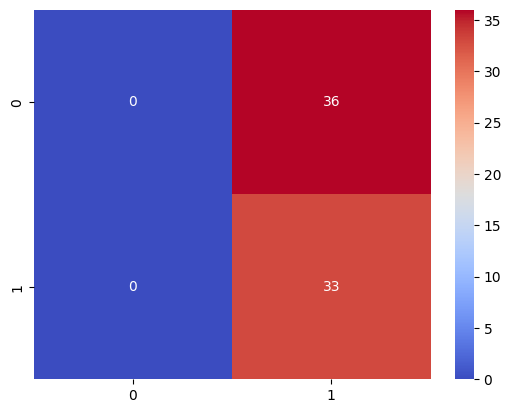

In [127]:
cm = confusion_matrix(y_test_us, y_pred2)
sns.heatmap(cm, annot = True, cmap = 'coolwarm')

In [128]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

model = XGBClassifier()
model.fit(x_train_us, y_train_us)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

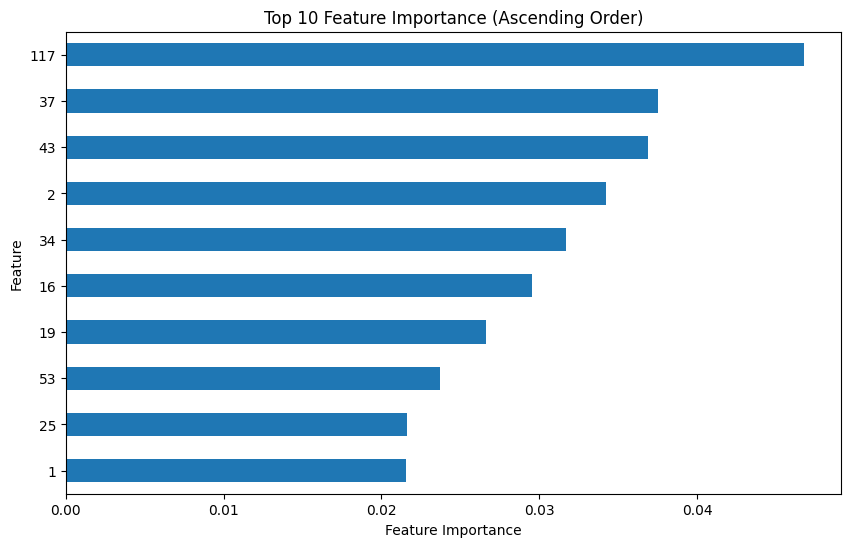

In [129]:
feature_importance = pd.Series(model.feature_importances_, index=df_pca2.iloc[:,:130].columns)

sorted_feature_importance = feature_importance.sort_values(ascending=True).tail(10)
plt.figure(figsize=(10, 6))
sorted_feature_importance.plot(kind="barh")
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importance (Ascending Order)')
plt.show()